In [22]:

import numpy as np
"""
This code imports the necessary libraries for working with neural networks.

- `numpy` is imported as `np` for numerical computations.
- `matplotlib.pyplot` is imported as `plt` for data visualization.
"""
import matplotlib.pyplot as plt


**INITIALISATION**

![pic 1.jpeg](<attachment:pic 1.jpeg>)
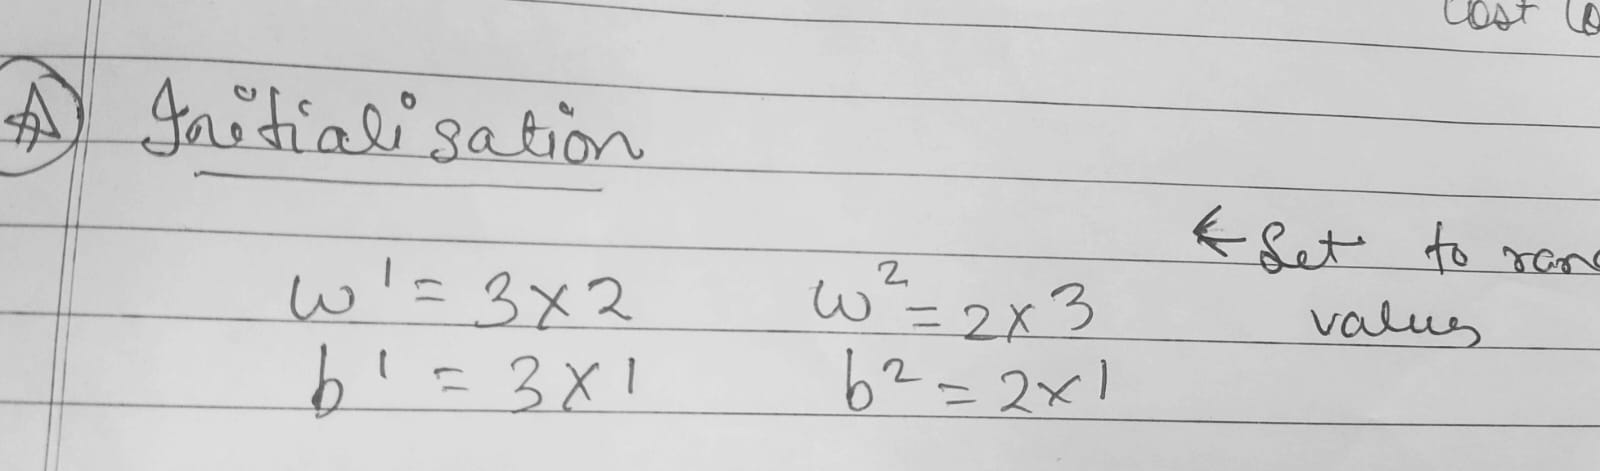

In [23]:
def initialise(in_neuron,hidden_neuron,out_neuron):
  """
  Initializes the weights and biases for a neural network.

  Parameters:
  - in_neuron (int): Number of input neurons.
  - hidden_neuron (int): Number of hidden neurons.
  - out_neuron (int): Number of output neurons.

  Returns:
  - w1 (ndarray): Weight matrix for the connections between input and hidden layer.
  - b1 (ndarray): Bias vector for the hidden layer.
  - w2 (ndarray): Weight matrix for the connections between hidden and output layer.
  - b2 (ndarray): Bias vector for the output layer.
  """
  w1=np.random.rand(hidden_neuron,in_neuron)-.5
  w2=np.random.rand(out_neuron,hidden_neuron)-.5
  b1=np.zeros((hidden_neuron,1))#np.random.rand(hidden_neuron,1)
  b2=np.zeros((out_neuron,1))
  return w1,b1,w2,b2

In [27]:
def ReLU(z):
  return np.maximum(0,z)
def linear(z):
  return z
def linearPrime(z):
  return 1
def ReLUPrime(z):
  a=ReLU(z)
  return a>0


![pic 2.jpeg](<attachment:pic 2.jpeg>)
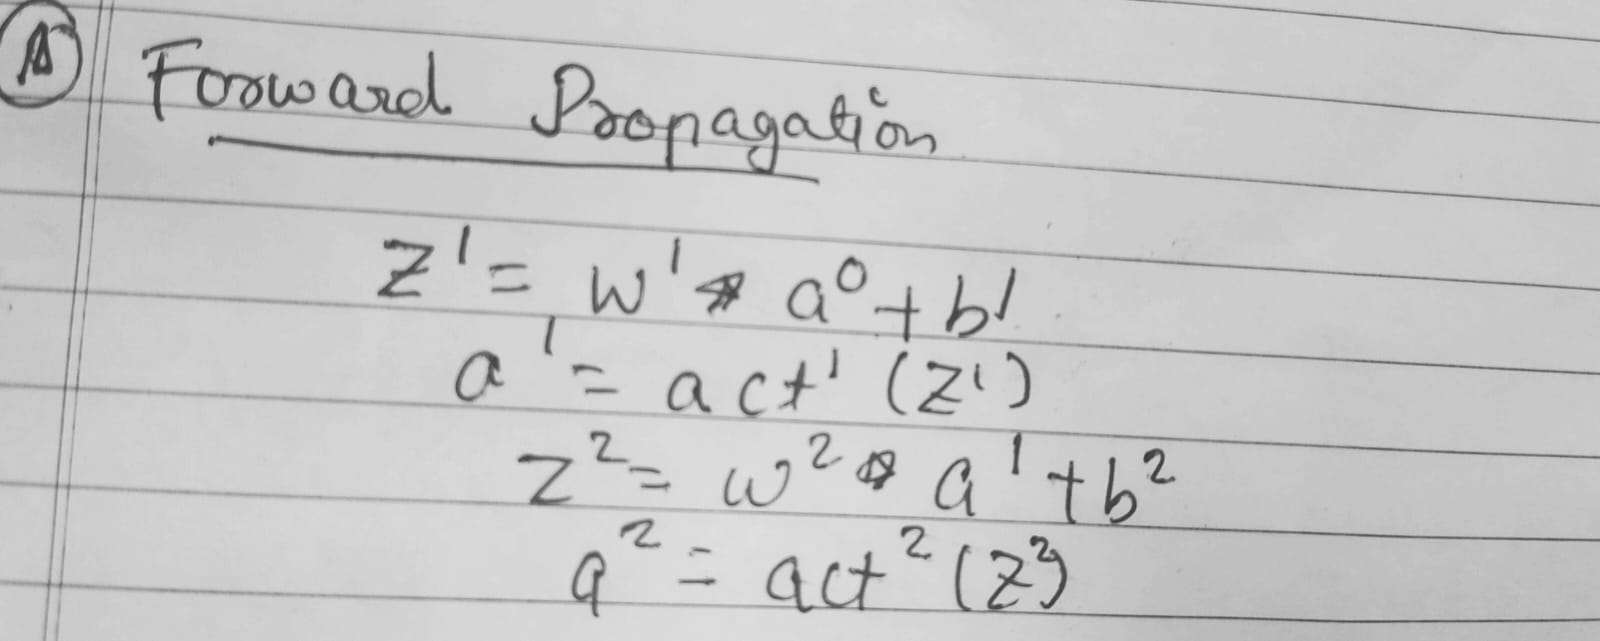

In [26]:
def forwardProp(a0,w1,b1,w2,b2):
  z1=np.dot(w1,a0)+b1
  a1=ReLU(z1)
  z2=np.dot(w2,a1)+b2
  a2=linear(z2)
  return z1,a1,z2,a2



![pic 3.jpeg](<attachment:pic 3.jpeg>)
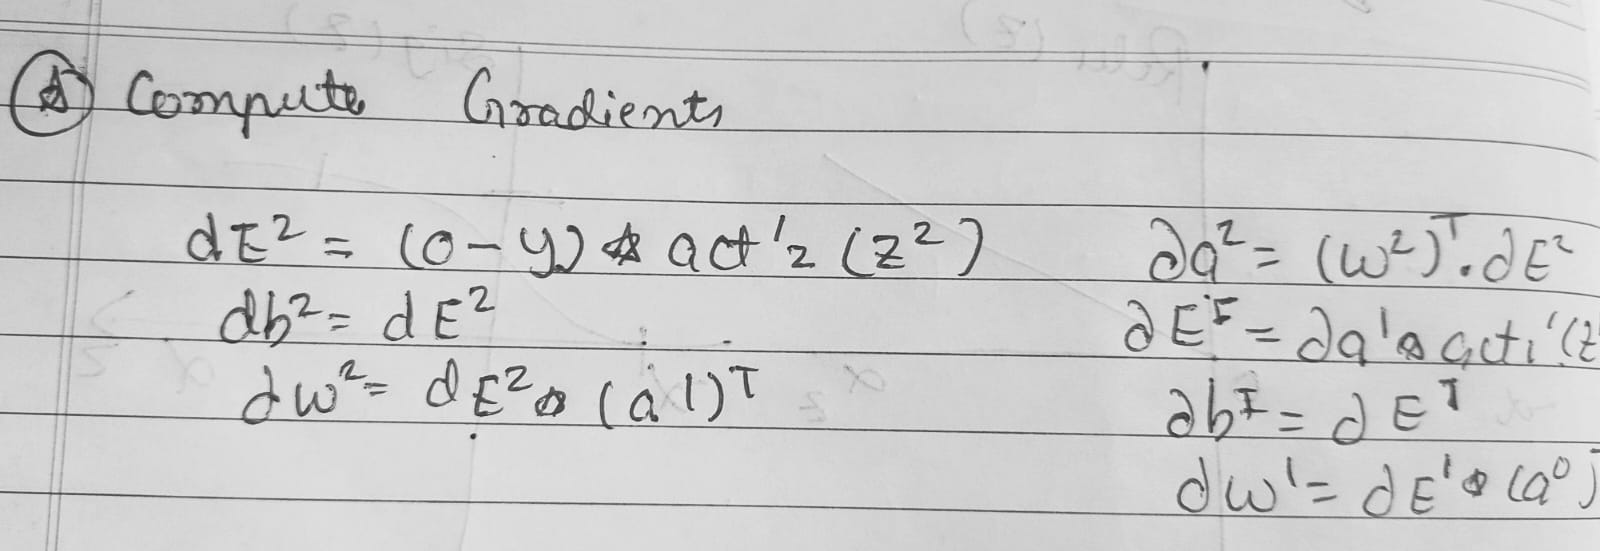

In [6]:
def computeGradient(a2,y,z2,a1,w2,z1,a0):
  de2=(a2-y)*linearPrime(z2)
  db2=de2
  dw2=np.dot(de2,a1.T)
  da1=np.dot(w2.T,de2)
  de1=da1*ReLUPrime(z1)
  db1=de1
  dw1=np.dot(de1,a0.T)
  return dw1,db1,dw2,db2

In [7]:
a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)
w1,b1,w2,b2=initialise(2,3,2)
z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
print(dw1)
print(db1)
print(dw2)
print(db2)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[-0.]
 [ 0.]
 [-0.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[ 0.5]
 [-0.5]]


![pic 4.jpeg](<attachment:pic 4.jpeg>)
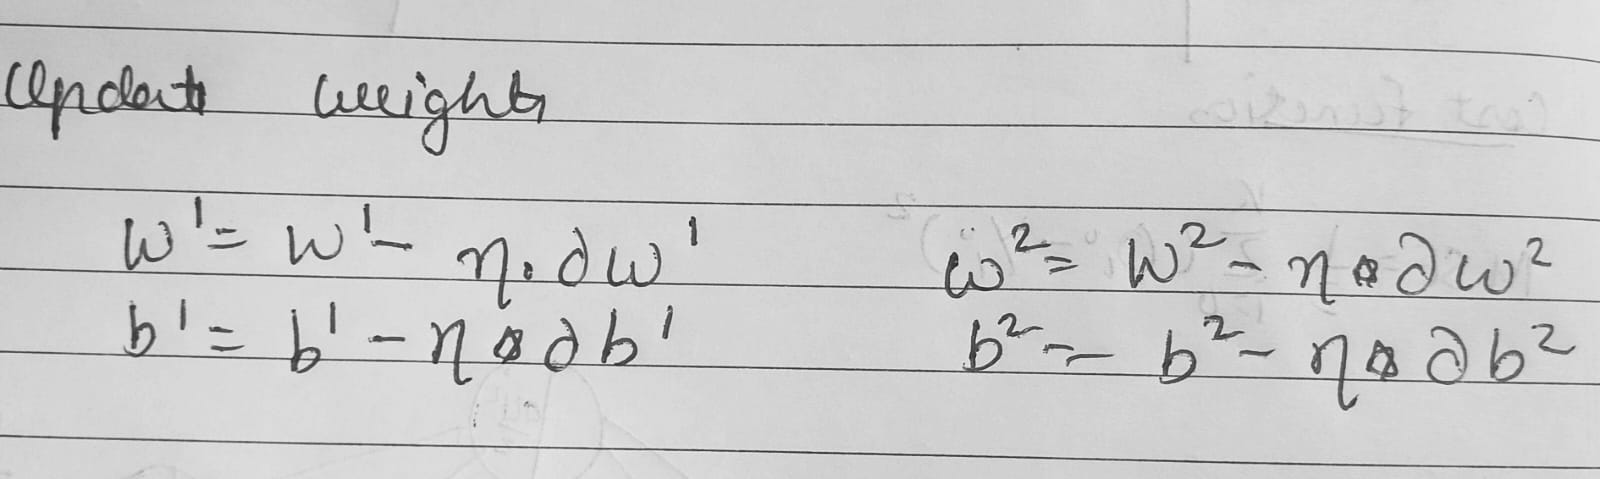

In [8]:

def updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta):
  w1=w1-eta*dw1
  b1=b1-eta*db1
  w2=w2-eta*dw2
  b2=b2-eta*db2
  return w1,b1,w2,b2

In [9]:
eta=0.1
epoch=100

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
  cost=np.sum((a2-y)**2)*.5
  print(a2)
  print(cost)


[[0.05340596]
 [0.12418963]]
0.2237457954249818
[[-0.04119453]
 [ 0.18107783]]
0.15610690269137403
[[-0.1200918 ]
 [ 0.23046244]]
0.10849036582660379
[[-0.18626989]
 [ 0.2733007 ]]
0.0749095775865775
[[-0.24181666]
 [ 0.31029286]]
0.05132371830039746
[[-0.28832916]
 [ 0.34203072]]
0.0348794189493279
[[-0.32711751]
 [ 0.36906325]]
0.023516393833967243
[[-0.35930588]
 [ 0.39191945]]
0.015738119959416305
[[-0.38588038]
 [ 0.41111016]]
0.010462345737293913
[[-0.40771086]
 [ 0.42712114]]
0.006914306658712564
[[-0.42556135]
 [ 0.44040451]]
0.004546367866419614
[[-0.4400968 ]
 [ 0.45137174]]
0.002976550841858972
[[-0.45188957]
 [ 0.46038973]]
0.0019417936481405554
[[-0.46142687]
 [ 0.46777976]]
0.0012630151464205885
[[-0.46911914]
 [ 0.47381889]]
0.0008195390246962743
[[-0.47530897]
 [ 0.47874301]]
0.0005307534308618571
[[-0.48028003]
 [ 0.48275084]]
0.00034320534754639636
[[-0.48426567]
 [ 0.48600835]]
0.0002216676698665406
[[-0.48745669]
 [ 0.48865322]]
0.00014304198562400348
[[-0.49000843]

In [10]:
x_input=np.random.uniform(-1,1,(1000,2))
print(x_input)
rm=[[-1,0],
    [0,1]]
x_ground=np.dot(rm,x_input.T).T
print(x_ground)


[[-0.33187168 -0.47435127]
 [ 0.61006211 -0.38787383]
 [-0.35487347  0.42364634]
 ...
 [-0.88229801 -0.09499706]
 [-0.14080456 -0.84571969]
 [-0.2554857  -0.46239117]]
[[ 0.33187168 -0.47435127]
 [-0.61006211 -0.38787383]
 [ 0.35487347  0.42364634]
 ...
 [ 0.88229801 -0.09499706]
 [ 0.14080456 -0.84571969]
 [ 0.2554857  -0.46239117]]


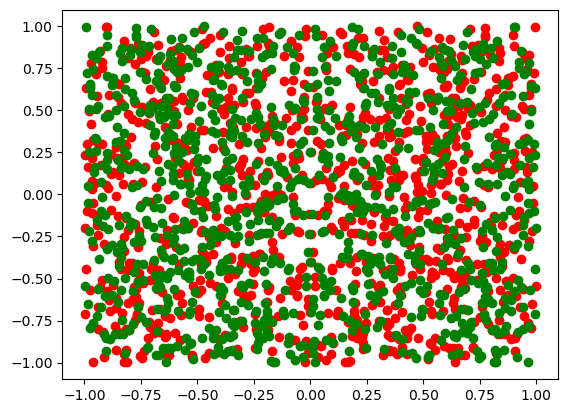

In [11]:
plt.scatter(x_input[:,0],x_input[:,1],c='RED')
plt.scatter(x_ground[:,0],x_ground[:,1],c='GREEN')
plt.show()
     


In [12]:
eta=0.1
epoch=100

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  cost=0;
  for j in range(1000):
    a0=x_input[j,:].T.reshape(2,1)
    y=x_ground[j,:].T.reshape(2,1)
    z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
    dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
    cost=cost+np.sum((a2-y)**2)*.5
  print(cost)

17.61137855789981
0.1815112028858985
0.048568996135778406
0.013729938885984859
0.005741408061782137
0.003130564174914857
0.0019073524957427042
0.001220586621520463
0.0008147769414967953
0.0005626785070070916
0.00040048451875150296
0.0002915290805027394
0.00021174180134190767
0.00015878103736806075
0.00012286914606030608
9.693284121488592e-05
7.869868117530591e-05
6.462382586876057e-05
5.3481787853932916e-05
4.5418474627694756e-05
3.855216619065378e-05
3.341684583507276e-05
2.809319394231772e-05
2.398363948846462e-05
2.0742172294601755e-05
1.8143556715447195e-05
1.6087590349328552e-05
1.444389345749368e-05
1.3017374927419905e-05
1.176236962611998e-05
1.0649240059536891e-05
9.656105538150763e-06
8.768572302237886e-06
7.99252923564134e-06
7.302293564579246e-06
6.686327402079119e-06
6.131336061958088e-06
5.6300964807987085e-06
5.176053432587754e-06
4.763905289311185e-06
4.389229862171791e-06
4.028906498828694e-06
3.6872327163733574e-06
3.3761713075834094e-06
3.0928376559419444e-06
2.834632

In [13]:
test_x=np.arange(0,1,.01)
test_y=test_x**2

test=np.column_stack([test_x,test_y])
print(test)
     

[[0.000e+00 0.000e+00]
 [1.000e-02 1.000e-04]
 [2.000e-02 4.000e-04]
 [3.000e-02 9.000e-04]
 [4.000e-02 1.600e-03]
 [5.000e-02 2.500e-03]
 [6.000e-02 3.600e-03]
 [7.000e-02 4.900e-03]
 [8.000e-02 6.400e-03]
 [9.000e-02 8.100e-03]
 [1.000e-01 1.000e-02]
 [1.100e-01 1.210e-02]
 [1.200e-01 1.440e-02]
 [1.300e-01 1.690e-02]
 [1.400e-01 1.960e-02]
 [1.500e-01 2.250e-02]
 [1.600e-01 2.560e-02]
 [1.700e-01 2.890e-02]
 [1.800e-01 3.240e-02]
 [1.900e-01 3.610e-02]
 [2.000e-01 4.000e-02]
 [2.100e-01 4.410e-02]
 [2.200e-01 4.840e-02]
 [2.300e-01 5.290e-02]
 [2.400e-01 5.760e-02]
 [2.500e-01 6.250e-02]
 [2.600e-01 6.760e-02]
 [2.700e-01 7.290e-02]
 [2.800e-01 7.840e-02]
 [2.900e-01 8.410e-02]
 [3.000e-01 9.000e-02]
 [3.100e-01 9.610e-02]
 [3.200e-01 1.024e-01]
 [3.300e-01 1.089e-01]
 [3.400e-01 1.156e-01]
 [3.500e-01 1.225e-01]
 [3.600e-01 1.296e-01]
 [3.700e-01 1.369e-01]
 [3.800e-01 1.444e-01]
 [3.900e-01 1.521e-01]
 [4.000e-01 1.600e-01]
 [4.100e-01 1.681e-01]
 [4.200e-01 1.764e-01]
 [4.300e-01

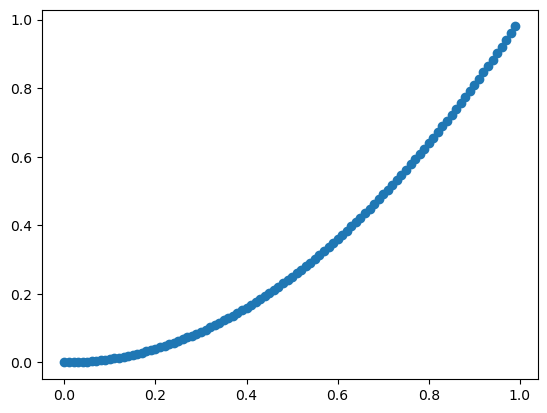

In [14]:

plt.scatter(test_x,test_y)
plt.show()

In [15]:

n=test.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=test[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

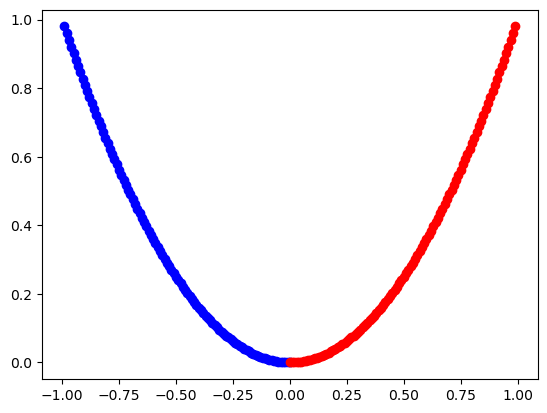

In [16]:
plt.scatter(o_x,o_y,c="blue")
plt.scatter(test[:,0],test[:,1],c="red")
plt.show()

In [17]:
import pandas as pd
xtest = pd.read_csv('file.csv')
xtest=np.array(xtest)

(18154, 2)


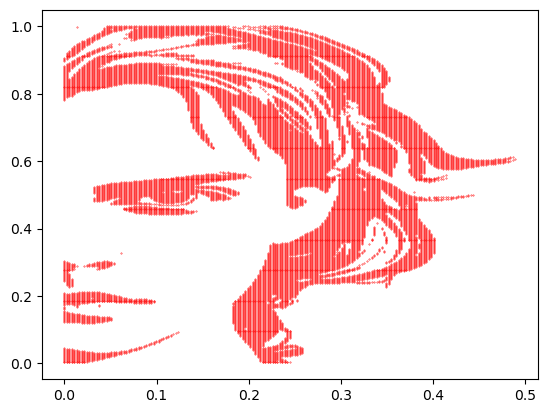

In [18]:
print(xtest.shape)
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c='RED')

In [19]:
n=xtest.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=xtest[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

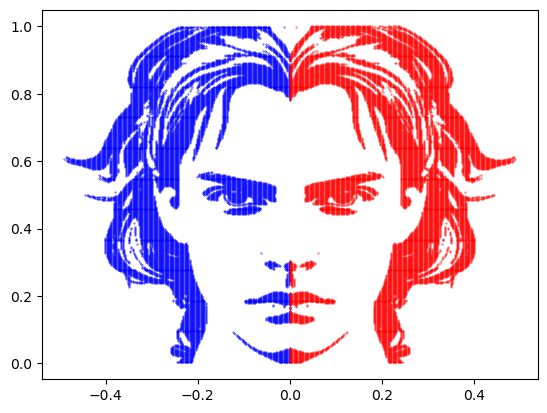

In [20]:
plt.scatter(o_x,o_y,s=.1,c="blue")
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c="red")
plt.show()
     